In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
df = pd.read_csv('df_provincie_06_22_bar.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1781 non-null   int64  
 1   Territorio  1781 non-null   object 
 2   Anno        1781 non-null   int64  
 3   Quintali    1781 non-null   int64  
 4   Var.%       1781 non-null   float64
 5   Classifica  1781 non-null   int64  
 6   id          1781 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 97.5+ KB


In [75]:
nuoro = df[df['Territorio'].isin(['Nuoro'])]
nuoro

,Unnamed: 0,Territorio,Anno,Quintali,Var.%,Classifica,id
56,56,Nuoro,2006,293550,0.00,51,91
158,56,Nuoro,2007,302887,3.18,49,91
260,56,Nuoro,2008,254254,-16.06,51,91
363,56,Nuoro,2009,251100,-1.24,50,91
469,59,Nuoro,2010,226272,-9.89,55,91
571,55,Nuoro,2011,222296,-1.76,53,91
676,59,Nuoro,2012,244631,10.05,50,91
782,59,Nuoro,2013,252032,3.03,51,91
888,59,Nuoro,2014,295962,17.43,46,91
993,58,Nuoro,2015,166039,-43.90,60,91


<AxesSubplot:xlabel='Anno', ylabel='Quintali'>

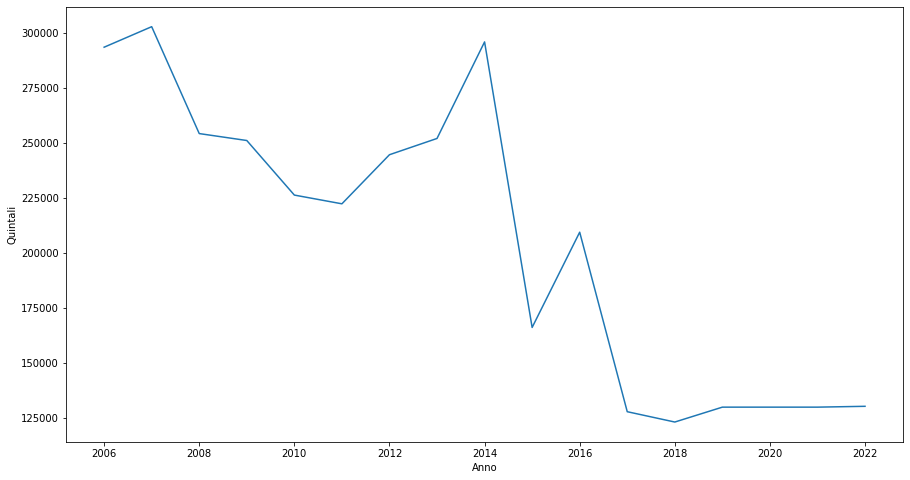

In [76]:
plt.figure(figsize =(15,8))

sns.lineplot(data = nuoro, x = 'Anno', y = 'Quintali')

In [77]:
import plotly.express as px


fig = px.line( nuoro,
              x = 'Anno',
              y = 'Quintali',
              hover_data = ['Classifica', 'Var.%'],
              width = 1000,
              title = 'Nuoro Trend (2006 - 2022)')

fig.show()

In [78]:
preprocessor = ColumnTransformer(transformers = [('cat', OneHotEncoder(sparse = True), ['Territorio']),
                                                 ],
                                 remainder = 'passthrough')

In [79]:
nuoro_transformed = preprocessor.fit_transform(nuoro)
nuoro_transformed.shape

(17, 7)

In [80]:
X_dataframe = pd.DataFrame(nuoro_transformed)

y = X_dataframe[3]
X_dataframe = X_dataframe[[0,1,2,4,5]]

In [81]:
X = X_dataframe

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)
mae_train = mean_absolute_error(y_train, p_train)
mae_test = mean_absolute_error(y_test, p_test)
print(f'MAE Train = {mae_train}, MAE Test = {mae_test}')
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print(f'Il modello di train ha una precisione del : {score_train} %')
print(f'Il modello di test ha una precisione del {score_test} % ')      

MAE Train = 6938.688376150524, MAE Test = 16779.74152369378
Il modello di train ha una precisione del : 0.9796635770744352 %
Il modello di test ha una precisione del 0.887303081835456 % 


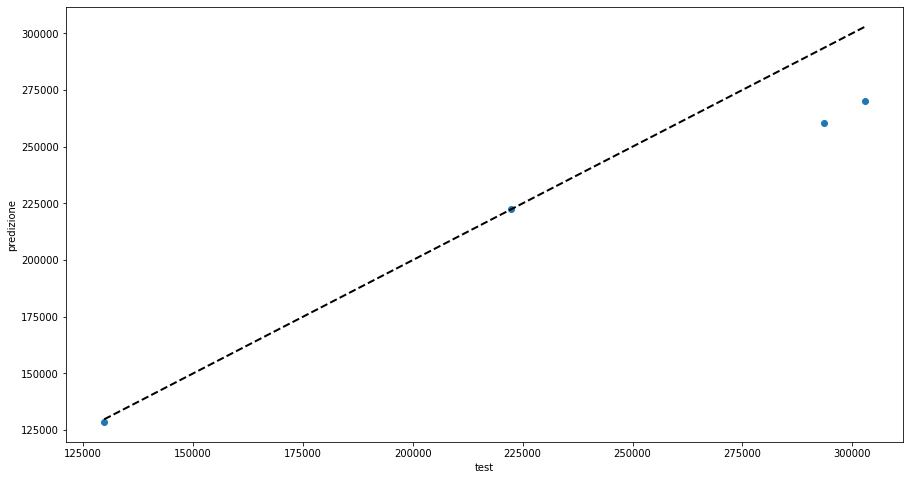

In [85]:
plt.figure(figsize = (15,8))

plt.xlabel('test')
plt.ylabel('predizione')
plt.scatter(y_test, p_test)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 'k--', lw=2)
plt.show()

In [86]:
X.tail()

,0,1,2,4,5
12,1.0,59.0,2018.0,-3.68,66.0
13,1.0,59.0,2019.0,5.51,66.0
14,1.0,59.0,2020.0,0.00,66.0
15,1.0,59.0,2021.0,0.00,64.0
16,1.0,59.0,2022.0,0.29,61.0


In [87]:
row = np.array([1.0, 59.0, 2022.0, 0.293569, 61.0]).reshape(-1,5)

In [88]:
predict_2023 = model.predict(row)

In [89]:
predict_2023

array([144903.44761301])

In [90]:
import plotly.graph_objs as go


In [91]:
# Dati storici
years = X[2]
data = y

In [92]:
# Previsione
pred_year = [2023]
pred_data = predict_2023


In [93]:
# Crea i tracciati per i dati storici e di previsione
trace1 = go.Scatter(
    x= years,
    y=data,
    mode='lines',
    name='Dati storici',
    marker=dict(color='blue')
)

In [94]:
trace2 = go.Scatter(
    x=pred_year,
    y=predict_2023,
    mode='markers',
    name='Previsione',
    marker=dict(color='red')
)

In [95]:
# Crea il grafico
data = [trace1, trace2]
layout = go.Layout(title='Dati storici e previsione',
                   width = 800)
fig = go.Figure(data=data, layout=layout,
            )

# Mostra il grafico
fig.show()

In [96]:
# Grafico con liena rossa

In [97]:
# Dati storici
years = X[2]
data = y

In [98]:
# Previsione
pred_year = [2023]
pred_data = predict_2023

In [99]:
# Crea i tracciati per i dati storici e di previsione
trace1 = go.Scatter(
    x=years,
    y=data,
    mode='lines',
    name='Dati storici',
    marker=dict(color='blue')
)

In [100]:
trace2 = go.Scatter(
    x=pred_year,
    y=pred_data,
    mode='markers',
    name='Previsione',
    marker=dict(color='red')
)

In [101]:
# Crea il tracciato per la linea di connessione
trace3 = go.Scatter(
    x=[years.loc[16], pred_year[0]],
    y=[data.loc[16], pred_data[0]],
    mode='lines',
    name='Connessione',
    marker=dict(color='red')
)


In [102]:
# Crea il grafico
data = [trace1, trace2, trace3]
layout = go.Layout(title='Nuoro Linear Regression Model Prediction 2023',
                   width = 800,
                   )
fig = go.Figure(data=data, layout=layout)

# Mostra il grafico
fig.show()